In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student/Students Performance Prediction.csv


/tmp/ipykernel_13/2912085486.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipykernel_13/2912085486.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

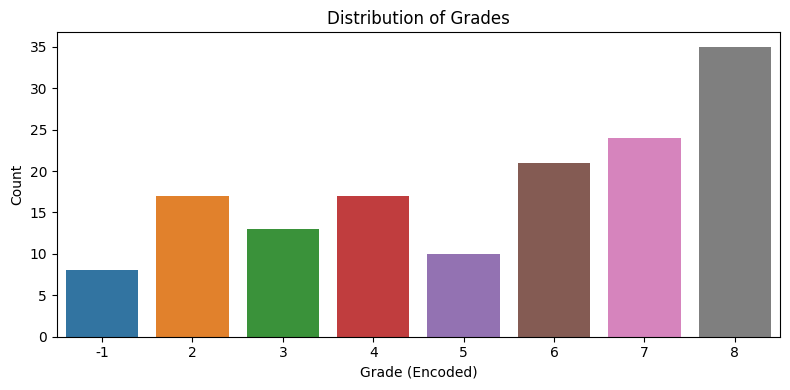

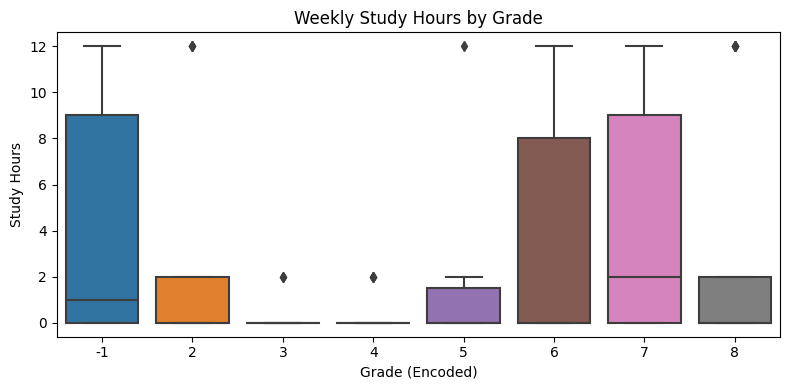

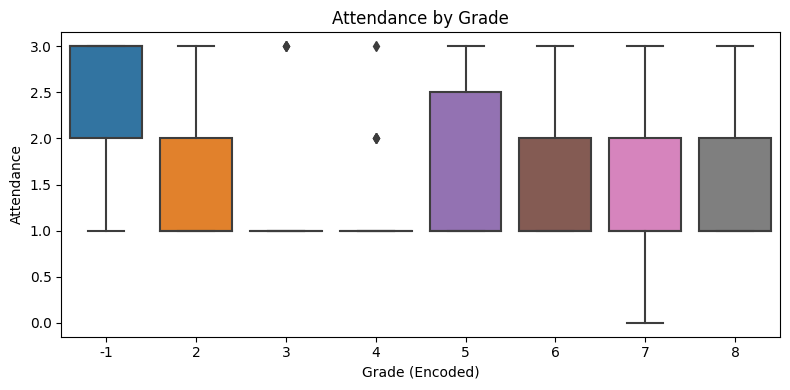

Accuracy: 0.20689655172413793

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           2       0.50      0.50      0.50         2
           3       0.50      0.25      0.33         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      0.33      0.40         6
           7       0.17      0.25      0.20         4
           8       0.09      0.33      0.14         3

    accuracy                           0.21        29
   macro avg       0.22      0.21      0.20        29
weighted avg       0.24      0.21      0.21        29


Confusion Matrix:
 [[0 0 0 0 1 0 0 3]
 [0 1 0 0 0 0 0 1]
 [0 0 1 1 0 1 1 0]
 [0 0 1 0 0 0 1 1]
 [0 0 0 1 0 0 0 2]
 [0 0 0 0 1 2 2 1]
 [0 1 0 0 0 0 1 2]
 [0 0 0 0 0 1 1 1]]


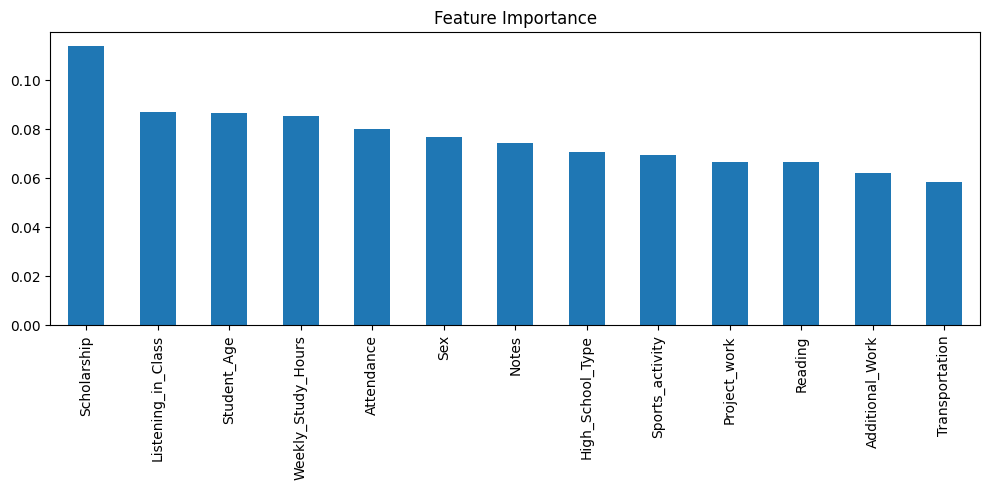

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("/kaggle/input/student/Students Performance Prediction.csv")

# Drop non-informative ID column
if "Student_ID" in df.columns:
    df.drop(columns=["Student_ID"], inplace=True)

# Handle missing values if any
if df.isnull().sum().any():
    for col in df.columns:
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

# Encode the target variable as ordinal (FF < FD < ... < AA)
grade_order = ['FF', 'FD', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA']
df['Grade'] = pd.Categorical(df['Grade'], categories=grade_order, ordered=True)
df['Grade'] = df['Grade'].cat.codes

# Encode all remaining categorical features
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# -------------------------
# Visualization
# -------------------------

# Grade Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Grade', data=df)
plt.title("Distribution of Grades")
plt.xlabel("Grade (Encoded)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Study Hours vs Grade
plt.figure(figsize=(8, 4))
sns.boxplot(x='Grade', y='Weekly_Study_Hours', data=df)
plt.title("Weekly Study Hours by Grade")
plt.xlabel("Grade (Encoded)")
plt.ylabel("Study Hours")
plt.tight_layout()
plt.show()

# Attendance vs Grade
plt.figure(figsize=(8, 4))
sns.boxplot(x='Grade', y='Attendance', data=df)
plt.title("Attendance by Grade")
plt.xlabel("Grade (Encoded)")
plt.ylabel("Attendance")
plt.tight_layout()
plt.show()

# -------------------------
# Model Training
# -------------------------

# Split dataset
X = df.drop(columns=["Grade"])
y = df["Grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Feature Importance
plt.figure(figsize=(10, 5))
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()